In [40]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt
import pygraphviz
import random

ModuleNotFoundError: No module named 'pygraphviz'

### Prim's algorithm

 Graph generation

In [13]:
def graph_gen(n):
    mat = np.zeros((n, n), dtype=int)
    c = 0
    m = n * 5
    while c < m:
        i = np.random.randint(n)
        j = np.random.randint(n)
        if (mat[i, j] == 0) and (i != j):
            w = np.random.randint(1, 1000)
            mat[i, j] = w
            mat[j, i] = w
            c += 1

    G = nx.from_numpy_matrix(mat)
    return G

Prim's method:

In [30]:

s = 20
e = 400
x = np.arange(s, e + 1)
times = []
for i in range(s, e + 1):
    G = graph_gen(i)
    avg_time = 0.0
    for j in range(5):
        start = time.time()
        res = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
        stop = time.time()
        avg_time += stop - start

    avg_time /= 5
    times.append(avg_time)

print(times)

[0.00022840499877929688, 0.00013136863708496094, 0.00017447471618652343, 0.00015821456909179688, 0.00017843246459960937, 0.00015783309936523438, 0.00019783973693847655, 0.00016160011291503905, 0.00023789405822753905, 0.00017242431640625, 0.00020647048950195312, 0.0002276897430419922, 0.0002029895782470703, 0.0002044677734375, 0.00020823478698730468, 0.00020756721496582032, 0.0002488136291503906, 0.0002112865447998047, 0.000235748291015625, 0.0003070831298828125, 0.00023474693298339844, 0.00024437904357910156, 0.0002952098846435547, 0.00029778480529785156, 0.0002670764923095703, 0.00027413368225097655, 0.0002812385559082031, 0.00029206275939941406, 0.00032787322998046876, 0.00029888153076171873, 0.0002933025360107422, 0.0003070354461669922, 0.00034089088439941405, 0.00031585693359375, 0.0003537178039550781, 0.0003573894500732422, 0.0003670692443847656, 0.00038857460021972655, 0.00035648345947265626, 0.00037064552307128904, 0.0003505229949951172, 0.000371551513671875, 0.00048584938049316

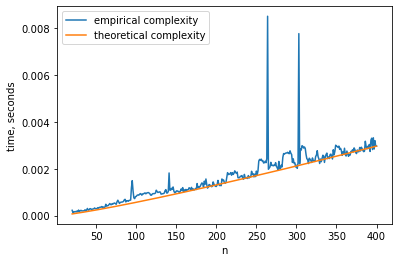

In [32]:
def f(x, y):
    return y[len(y) - 1] / (5 * 400 * np.log2(400)) * 5 * x * np.log2(x)

plt.plot(x, times, label='empirical complexity')
plt.plot(x, f(x, times), label='theoretical complexity')
plt.ylabel('time, seconds')
plt.xlabel('n')
plt.legend()
plt.savefig("Prim.png", dpi=500)
plt.show()

### Maximum flow search

9


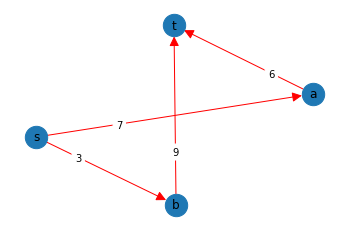

11


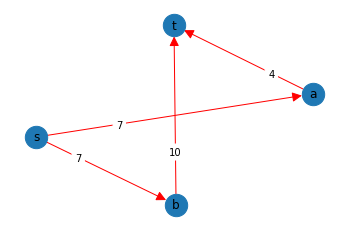

16


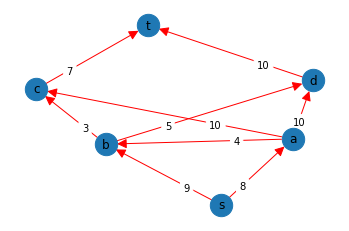

In [85]:
G = nx.DiGraph()
# G.add_nodes_from(['s', 'a', 'b', 'c', 'd', 't'])
# G.add_edges_from([('s', 'a'), ('s', 'b'), ('a', 'b'),
#                   ('a', 'c'), ('b', 'd'), ('b', 'c'),
#                   ('c', 't'), ('d', 't')])

G.add_nodes_from(['s', 'a', 'b', 't'])
G.add_edges_from([('s', 'a'), ('s', 'b'),
                  ('a', 't'), ('b', 't')])

c = 0
def draw_graph(G, c):
    pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,
                                 verticalalignment='center_baseline',
                                 rotate=False,
                                 clip_on=False,
                                 label_pos=0.7)
    nx.draw(G, pos=pos, with_labels=True, edge_color='red',
            node_size=500, arrows=True, arrowsize=20)
    plt.savefig("graph" + str(c) + ".png", dpi=500)
    c += 1
    plt.show()

for i in range(2):
    for node in G:
        for node1 in G[node]:
            G[node][node1]['weight'] = np.random.randint(3, 11)

    res = nx.algorithms.flow.edmonds_karp(G, 's', 't', capacity='weight')
    print(res.graph["flow_value"])
    draw_graph(G, i)


G1 = nx.DiGraph()
G1.add_nodes_from(['s', 'a', 'b', 'c', 'd', 't'])
G1.add_edges_from([('s', 'a'), ('s', 'b'), ('a', 'b'),
                   ('a', 'c'), ('b', 'd'), ('b', 'c'),
                   ('a', 'd'), ('c', 't'), ('d', 't')])

for node in G1:
    for node1 in G1[node]:
        G1[node][node1]['weight'] = np.random.randint(3, 11)

res = nx.algorithms.flow.edmonds_karp(G1, 's', 't', capacity='weight')
print(res.graph["flow_value"])
draw_graph(G1, 3)